# Importing the necessary library 

In [1]:
import os
import random

#hindi font
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

import numpy as np
import pandas as pd

#image display
import cv2

#tqdm used for progress bar
from tqdm.notebook import tqdm
from sklearn.metrics import accuracy_score

# The names of each character, in the correct order for the Hindi Devnagri script

In [2]:
class_names='''character_1_ka character_2_kha character_3_ga character_4_gha character_5_kna character_6_cha character_7_chha 
character_8_ja character_9_jha character_10_yna character_11_taamatar character_12_thaa character_13_daa character_14_dhaa 
character_15_adna character_16_tabala character_17_tha character_18_da character_19_dha character_20_na character_21_pa 
character_22_pha character_23_ba character_24_bha character_25_ma character_26_yaw character_27_ra character_28_la 
character_29_waw character_30_motosaw character_31_petchiryakha character_32_patalosaw character_33_ha character_34_chhya 
character_35_tra character_36_gya digit_0 digit_1 digit_2 digit_3 digit_4 digit_5 digit_6 digit_7 digit_8 digit_9'''.split()

hindi_character = 'क ख ग घ ङ च छ ज झ ञ ट ठ ड ढ ण त थ द ध न प फ ब भ म य र ल व श ष स ह ॠ त्र ज्ञ ० १ २ ३ ४ ५ ६ ७ ८ ९'.split() 

In [3]:
print(hindi_character)

['क', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', 'ॠ', 'त्र', 'ज्ञ', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']


In [4]:
hindi_font = FontProperties(fname='./hindi-font/Nirmala.ttf') # Hindi font to display in Matplotlib

# Define the paths

In [5]:
dataset_path =r"C:\Users\DELL\jupyterr/DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test"


train_dataset_path = dataset_path+"/Train"
test_dataset_path = dataset_path+"/Test"

print(f"Train Path : {train_dataset_path}")
print(f"Test Path : {test_dataset_path}")

Train Path : C:\Users\DELL\jupyterr/DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Train
Test Path : C:\Users\DELL\jupyterr/DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test


# Visualize the data

In [6]:
def see_random_picture(target_dir , class_name):
    target_directory = target_dir + '/' + class_name                    # Example --> Train + '/' + character_1_ka  -->  Train/character_1_ka
    random_picture_name = random.choice(os.listdir(target_directory))   # Selecting random image from Train/character_1_ka
    image_path = target_directory + '/' + random_picture_name           # let say random image name is 10963.png , so final image path would be :                                                                      #                                                     Train/character_1_ka/10963.png
    image = plt.imread(image_path) 

    hindi_char_name = hindi_character[class_names.index(class_name)]
    hindi_font = FontProperties(fname='./hindi-font/Nirmala.ttf')

    plt.figure(figsize=(2,2))
    print(f"Shape of image : {image.shape}")  #  display the shape of the image.
    plt.imshow(image , cmap='gray')
    plt.title(f"{class_name} - ({hindi_char_name})",fontproperties=hindi_font)
    plt.axis("off")

# Let view any random character from train data


Shape of image : (32, 32)


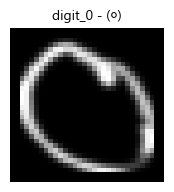

In [7]:
see_random_picture(train_dataset_path,
                   random.choice(class_names))

# Load Data

In [8]:
def load_data_from_directory(directory, class_names, description=None):
    all_images = []
    all_labels = []

    for class_name in tqdm(class_names,desc=description):
        target_dir = directory + "/" + class_name
        images = os.listdir(target_dir)

        for img in images:
            img_path = target_dir + "/" + img
            img_arr = cv2.imread(img_path,0).flatten()
            img_label = class_names.index(class_name)

            all_images.append(img_arr.astype('float32'))
            all_labels.append(img_label)

    return np.array(all_images), np.array(all_labels)

In [9]:
X_train, y_train = load_data_from_directory(train_dataset_path,class_names,"Loading train data...  ")
X_test, y_test = load_data_from_directory(test_dataset_path,class_names,"Loading test data...  ")

Loading train data...  :   0%|          | 0/46 [00:00<?, ?it/s]

Loading test data...  :   0%|          | 0/46 [00:00<?, ?it/s]

In [10]:
X_train.shape, X_test.shape 

((7820, 1024), (13800, 1024))

In [11]:
y_train.shape, y_test.shape

((7820,), (13800,))

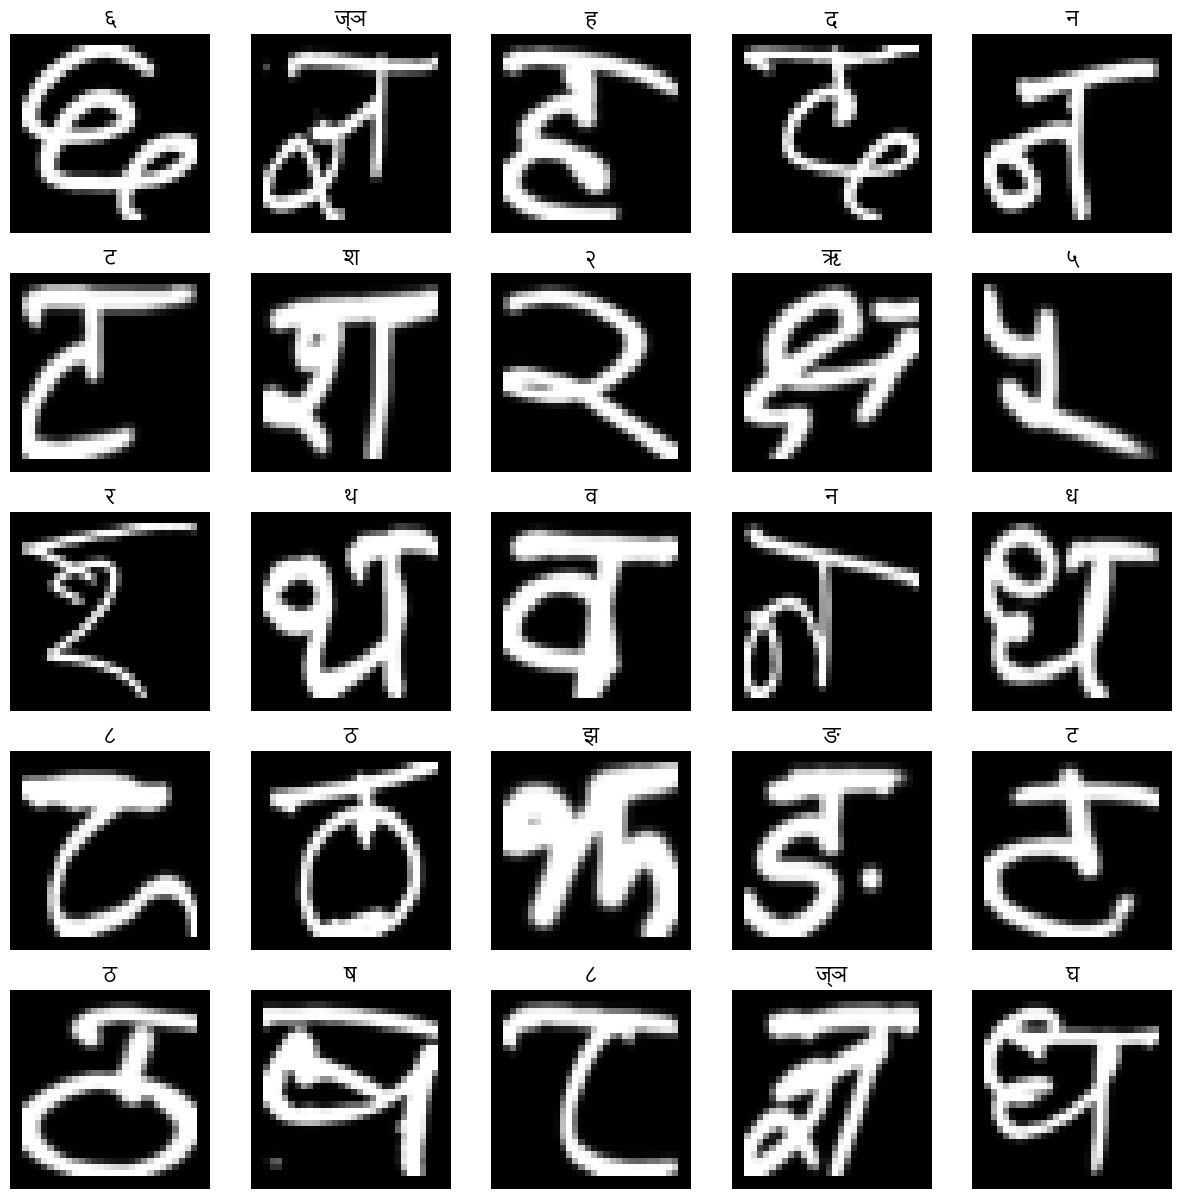

In [12]:
fig, ax = plt.subplots(5,5, figsize=(15,15))
ax = ax.flatten()

for i in range(25):
    k = np.random.randint(0,len(X_train))
    
    img = X_train[k]
    label = y_train[k]
    
    ax[i].imshow(img.reshape(32,32),cmap='gray')
    ax[i].axis(False)
    ax[i].set_title(hindi_character[label],fontproperties=hindi_font, fontsize=15)

plt.show()

# Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Feature Selection: PCA

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=0.98)  # Retain 98% of information
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [17]:
X_train_pca.shape, X_test_pca.shape

((7820, 293), (13800, 293))

# SVC Model

In [18]:
from sklearn.svm import SVC

In [19]:
# Initialize SVC with default parameters
svc_classifier = SVC()

In [20]:
# Fit the classifier on the reduced dimensionality data
svc_classifier.fit(X_train_pca, y_train)

SVC()

In [21]:
# Predictions on the test set
y_pred = svc_classifier.predict(X_test_pca)

In [22]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8338405797101449

# Hyper parameter tunning 

In [23]:
import optuna
from sklearn.model_selection import cross_val_score

In [24]:
def objective(trial):
    # Define search space for hyperparameters
    C = trial.suggest_float('C', 1e-5, 1e5,log=True)
    kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])   # , 'sigmoid'
    degree = trial.suggest_int('degree', 2, 5) # if kernel == 'poly' else None
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto']) # if kernel in ['rbf', 'poly', 'sigmoid'] else 'scale'

    # C = trial.suggest_float('C', 1e-3, 1e3, log=True)
    # kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly'])
    # gamma = trial.suggest_float('gamma', 1e-3, 1e3, log=True)

    # Initialize SVC classifier with hyperparameters
    svc_classifier = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)

    # Use cross-validation for training and evaluation
    cv_score = cross_val_score(svc_classifier, X_train_pca, y_train, cv=5, scoring='accuracy').mean()

    return cv_score

In [25]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50, n_jobs=-1)

[I 2024-02-24 09:26:27,902] A new study created in memory with name: no-name-93425a52-2df9-4e30-84b0-dece5fa9bc1d
[I 2024-02-24 09:28:56,336] Trial 5 finished with value: 0.6063938618925832 and parameters: {'C': 11.203183778934283, 'kernel': 'linear', 'degree': 5, 'gamma': 'scale'}. Best is trial 5 with value: 0.6063938618925832.
[I 2024-02-24 09:31:34,641] Trial 8 finished with value: 0.6063938618925832 and parameters: {'C': 78009.08191167947, 'kernel': 'linear', 'degree': 3, 'gamma': 'scale'}. Best is trial 5 with value: 0.6063938618925832.
[I 2024-02-24 09:31:38,774] Trial 2 finished with value: 0.6542199488491048 and parameters: {'C': 34736.44428695102, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale'}. Best is trial 2 with value: 0.6542199488491048.
[I 2024-02-24 09:31:39,911] Trial 6 finished with value: 0.6542199488491048 and parameters: {'C': 24.865897631341955, 'kernel': 'poly', 'degree': 2, 'gamma': 'scale'}. Best is trial 2 with value: 0.6542199488491048.
[I 2024-02-24 09:31:

In [26]:
# Get the best hyperparameters
best_params = study.best_params
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'C': 30417.26744464879, 'kernel': 'rbf', 'degree': 3, 'gamma': 'scale'}


In [27]:
best_svc_classifier = SVC(C=best_params['C'],kernel=best_params['kernel'],degree=best_params['degree'],gamma=best_params['gamma'])
best_svc_classifier.fit(X_train_pca,y_train)

SVC(C=30417.26744464879)

In [28]:
# Evaluate the performance on the test set
y_pred = best_svc_classifier.predict(X_test_pca)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.2%}")

Final Model Accuracy: 86.47%


# Save best model

In [32]:
import joblib

In [34]:
def save_model(model, filename):
    try:
        joblib.dump(model, f"./MyModels/{filename}" )
        print(f"Model saved successfully to ./MyModels/{filename}")
    except Exception as e:
        print(f"Error saving the model: {e}")

In [35]:
save_model(best_svc_classifier, 'best_svc_classifier_model.joblib')

Model saved successfully to ./MyModels/best_svc_classifier_model.joblib


In [37]:
def pred_and_plot(model):

    fig, ax = plt.subplots(6,6, figsize=(15,15))
    ax = ax.flatten()
    
    for i in range(36):
        k = np.random.randint(0, len(X_test))
        img = X_test[k]
        img_pca = X_test_pca[k]
    
        pred_class = model.predict([img_pca])[0]
        true_class = y_test[k]
    
        if pred_class == true_class:
            color='green'
        else:
            color='red'
    
        ax[i].imshow(img.reshape(32,32),cmap='gray_r')
        ax[i].axis(False)
        ax[i].set_title(f"Actual Class: {hindi_character[true_class]}\nPredicted Class: {hindi_character[pred_class]}",
                        color=color,
                        fontproperties=hindi_font)
    
    plt.show()

In [38]:
def single_image_prediction(img,model):
    img_arr = cv2.imread(img,0).flatten().astype("float32")
    img_scaler = scaler.transform(img_arr.reshape(1,-1))
    img_pca = pca.transform(img_scaler)

    y_pred = model.predict(img_pca)[0]
    pred_class = hindi_character[y_pred]

    plt.imshow(img_arr.reshape(32,32),cmap='gray')
    plt.title(f"Predicted Class : {pred_class} ",fontproperties=hindi_font,fontsize=20)
    plt.axis(False)
    plt.show()

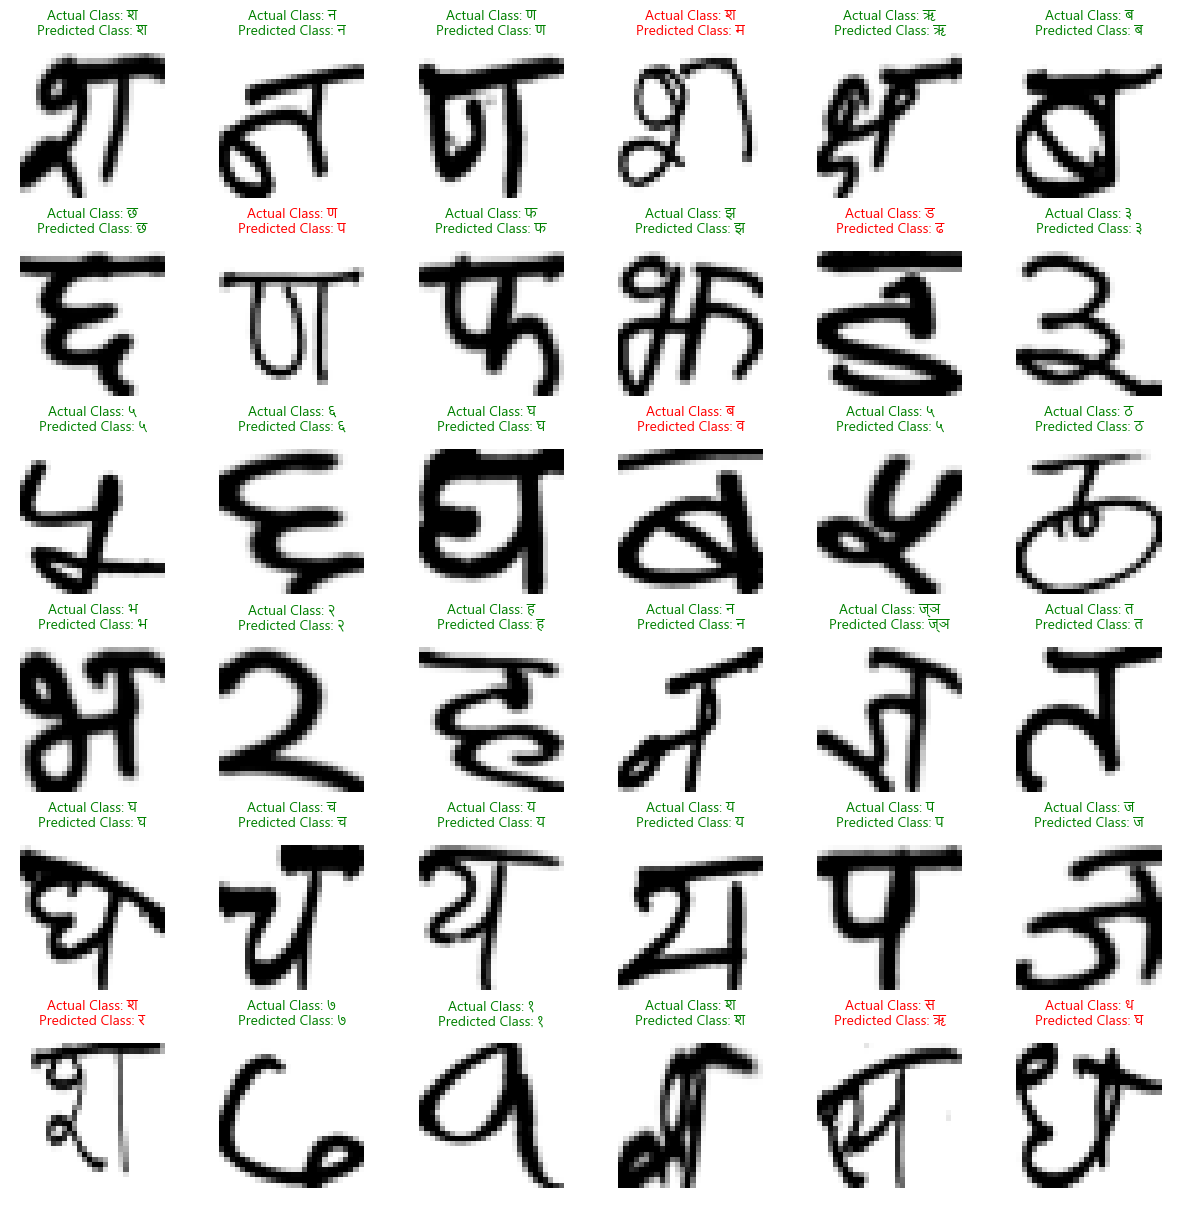

In [39]:
pred_and_plot(best_svc_classifier)

In [47]:
test_img_1 = "./DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test/character_28_la/11430.png"
test_img_2 = "./DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test/character_21_pa/11115.png"
test_img_3 = "./DevanagariHandwrittenCharacterDataset_10_per_train_100_per_test/Test/character_25_ma/17568.png"

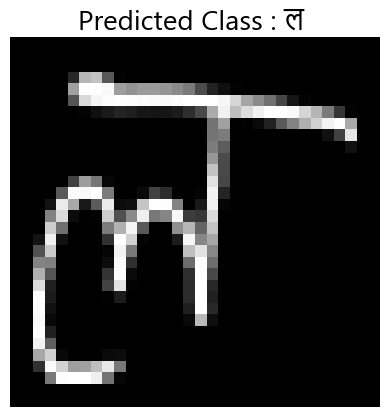

In [41]:
single_image_prediction(test_img_1,best_svc_classifier)

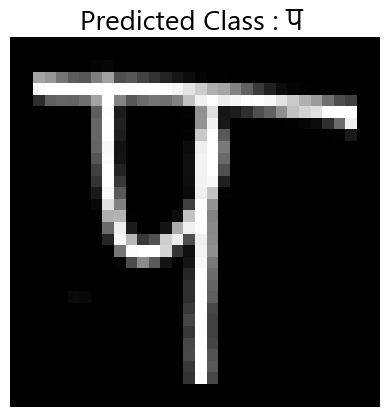

In [42]:
single_image_prediction(test_img_2,best_svc_classifier)

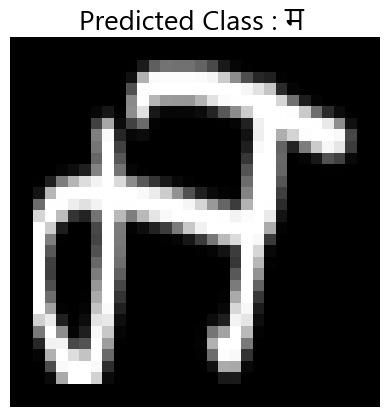

In [46]:
single_image_prediction(test_img_3,best_svc_classifier)

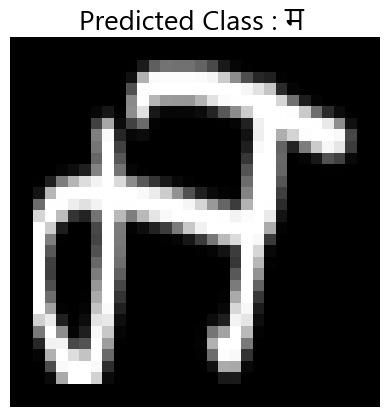

In [49]:
single_image_prediction(test_img_3,best_svc_classifier)